In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, mpld3
import seaborn as sns
import os
import re
%matplotlib notebook
import Functions as f

In [2]:
# Input folder location
PMF = r"V:\j24130900\OpenFoam\Run\PU_Final4"
DF = r"V:\j24130900\OpenFoam\Run\PU_Combined"

# Number of vtk's to use for timeseries statistics.
Number = 80

# Total Time (mins)

t = 100

<IPython.core.display.Javascript object>


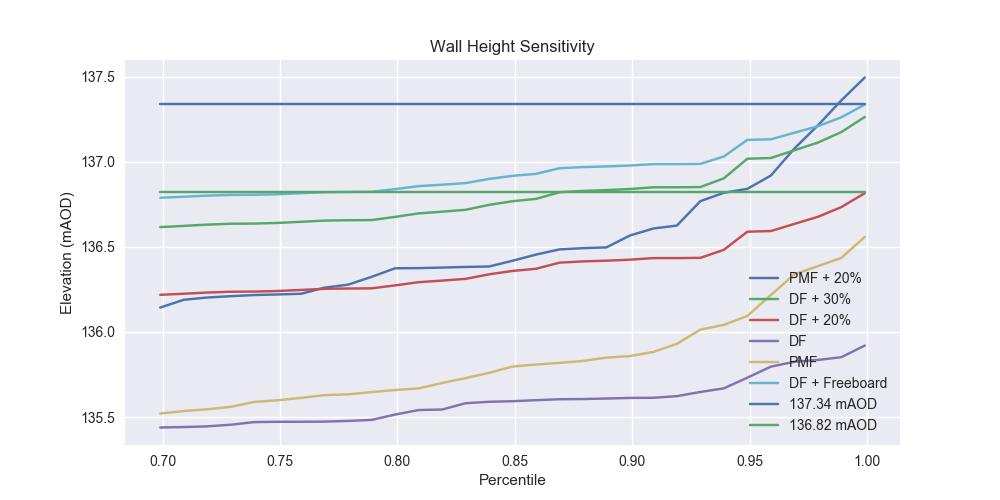

In [6]:
def percentile(wall,folder,Number,freeboard):
    points = f.LoadCSV(wall,folder)
    points = points.loc[points.index >= points[points['z'] == 131.44].index[0]]
    df = points.iloc[:,-min(Number,len(list(points)[4:])):].copy()
    twl = pd.DataFrame(np.sort(df.values)[:,-3:], columns=['3rd','2nd','1st'])
    for index, row in twl.iterrows():
        if row['1st'] - row['2nd'] > 0.2 and row['2nd'] - row['3rd'] > 0.2:
            df = df.replace(row['1st'],'NaN')
            df = df.replace(row['2nd'],'NaN') 
        elif row['1st'] - row['2nd'] > 0.2:
            df = df.replace(row['1st'],'NaN')
    dicts = {}
    for i in np.arange(0.699,1.0,0.01):
        #dicts[str(i)] = df.quantile(i,1)
        if freeboard == "Eq":
            dicts[str(i)] = (((df.quantile(i,1) - points['z']) + 9.69) * 0.1) + df.quantile(i,1)
        else:
            dicts[str(i)] = ((df.quantile(i,1) - points['z']) * freeboard) + points['z']
    new = pd.DataFrame(dicts).transpose()
    new['Max'] = new.max(axis=1)
    return new['Max']

def wallheight(folder,Number,freeboard):
    d = {'Left' : percentile('lwe',folder,Number,freeboard),
        'Right' : percentile('rwe',folder,Number,freeboard)}
    out = pd.DataFrame(d)
    out['Max (mAOD)'] = out.max(axis=1)
    out['Time (mins)'] = out.index.astype(float)
    out['Time (mins)'] = (1.0 - out['Time (mins)']) * t
    return out

outpmf = wallheight(PMF,Number,1.2)
outdf = wallheight(DF,Number,1.3)
outdf2 = wallheight(DF,Number,1.2)
outdf3 = wallheight(DF,Number,1.0)
outdf4 = wallheight(PMF,Number,1.0)
outdfeq = wallheight(DF,Number,"Eq")
outdf['Line'] = 137.34
outdf['Line2'] = 136.82
#outdf['Line3'] = 131.44

fig = plt.figure(figsize=(10, 5))
plt.plot(outpmf['Max (mAOD)'],label="PMF + 20%")
plt.plot(outdf['Max (mAOD)'],label="DF + 30%")
plt.plot(outdf2['Max (mAOD)'],label="DF + 20%")
plt.plot(outdf3['Max (mAOD)'],label="DF")
plt.plot(outdf4['Max (mAOD)'],label="PMF")
plt.plot(outdfeq['Max (mAOD)'],label="DF + Freeboard")
plt.plot(outdf['Line'],label="137.34 mAOD")
plt.plot(outdf['Line2'],label="136.82 mAOD")
#plt.plot(outdf['Line3'],label="131.44 mAOD")
plt.legend()
plt.title('Wall Height Sensitivity')
plt.ylabel('Elevation (mAOD)')
plt.xlabel('Percentile')
plt.show()

In [14]:
outdf2.sort_index(axis=0,ascending=False).head(20)

,Left,Right,Max (mAOD),Time (mins)
0.9999,136.823578,136.544224,136.823578,0.01
0.9899,136.741342,136.486624,136.741342,1.01
0.9799,136.679654,136.460083,136.679654,2.01
0.9699,136.639851,136.425208,136.639851,3.01
0.9599,136.593579,136.346026,136.593579,4.01
0.9499,136.589883,136.268626,136.589883,5.01
0.9399,136.493539,136.185745,136.493539,6.01
0.9299,136.435846,136.120330,136.435846,7.01
0.9199,136.434400,136.093339,136.434400,8.01
0.9099,136.434400,136.067239,136.434400,9.01


In [6]:
def percentile2(wall,folder,Number,freeboard):
    points = f.LoadCSV(wall,folder)
    points = points.loc[points.index >= points[points['z'] == 131.44].index[0]]
    df = points.iloc[:,-min(Number,len(list(points)[4:])):].copy()
    twl = pd.DataFrame(np.sort(df.values)[:,-3:], columns=['3rd','2nd','1st'])
    for index, row in twl.iterrows():
        if row['1st'] - row['2nd'] > 0.2 and row['2nd'] - row['3rd'] > 0.2:
            df = df.replace(row['1st'],'NaN')
            df = df.replace(row['2nd'],'NaN') 
        elif row['1st'] - row['2nd'] > 0.2:
            df = df.replace(row['1st'],'NaN')
    dicts = {}
    for i in np.arange(0.7999,1.0,0.01):
        #dicts[str(i)] = df.quantile(i,1)
        if freeboard == "Eq":
            dicts[str(i)] = (((df.quantile(i,1) - points['z']) + 9.69) * 0.1) + points['z'] + (df.quantile(i,1) - points['z'])
        else:
            dicts[str(i)] = ((df.quantile(i,1) - points['z']) * freeboard) + points['z']
    new = pd.DataFrame(dicts).transpose()
    new['Max'] = new.max(axis=1)
    return new['Max'], dicts, df

In [7]:
x,y,df = percentile2("lwe",DF,Number,1)

In [8]:
y

{'0.7999': 21    132.442923
 22    132.104700
 23    133.958546
 24    134.647438
 25    135.025369
 26    135.123400
 27    135.469992
 28    135.115846
 29    135.115846
 30    135.518169
 31    135.472592
 32    135.472592
 33    135.164246
 34    134.421292
 35    134.835777
 dtype: float64, '0.8099': 21    132.450623
 22    132.110000
 23    133.979608
 24    134.661434
 25    135.038594
 26    135.136536
 27    135.484623
 28    135.125449
 29    135.125449
 30    135.541000
 31    135.489304
 32    135.489304
 33    135.183000
 34    134.433159
 35    134.840985
 dtype: float64, '0.8199': 21    132.459646
 22    132.110529
 23    134.010199
 24    134.672323
 25    135.059794
 26    135.147615
 27    135.492455
 28    135.135144
 29    135.135144
 30    135.547350
 31    135.521043
 32    135.521043
 33    135.183926
 34    134.445588
 35    134.849058
 dtype: float64, '0.8299': 21    132.475046
 22    132.113609
 23    134.110299
 24    134.680023
 25    135.064414
 26    135.1

In [9]:
kk = pd.DataFrame(y)

<IPython.core.display.Javascript object>


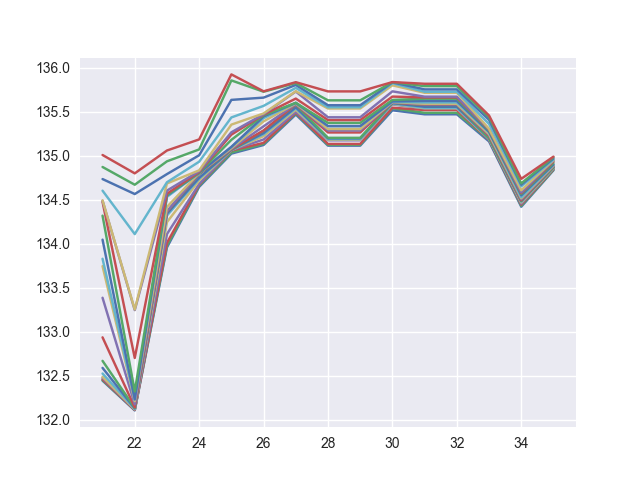

In [12]:
plt.figure()
plt.plot(kk)
plt.show()

In [20]:
kk

,0.7999,0.8099,0.8199,0.8299,0.8399,0.8499,0.8599,0.8699,0.8799,0.8899,...,0.9099,0.9199,0.9299,0.9399,0.9499,0.9599,0.9699,0.9799,0.9899,0.9999
21,132.803671,132.804694,132.806446,132.807499,132.808000,132.808154,132.810782,132.820045,132.829238,132.831866,...,132.835229,132.838183,132.839059,132.848023,132.854422,132.857483,132.872375,132.891742,132.919071,132.957615
22,132.462871,132.463600,132.463600,132.463600,132.463975,132.467823,132.519507,132.535600,132.538392,132.547152,...,132.569151,132.575649,132.583533,132.584800,132.586445,132.602163,132.728307,133.112064,133.472391,133.621311
23,132.661512,132.680285,132.748613,132.867286,132.967541,133.058514,133.669086,133.876694,133.928347,134.036095,...,134.195179,134.324970,134.451990,134.501074,134.519200,134.527139,134.606855,134.663558,134.706064,134.738476
24,134.078800,134.089254,134.151450,134.193368,134.265433,134.378574,134.395218,134.414275,134.449222,134.515798,...,134.613382,134.640766,134.642518,134.742793,134.898940,135.090722,135.226502,135.266396,135.280549,135.312085
25,134.729326,134.738800,134.738800,134.738800,134.791334,134.911207,134.986543,135.011206,135.013238,135.015866,...,135.157032,135.185797,135.217333,135.225341,135.269969,135.355402,135.389566,135.418616,135.528050,135.783842
26,135.232000,135.232000,135.232000,135.234797,135.237175,135.238051,135.238927,135.241010,135.250898,135.276302,...,135.384365,135.456907,135.545383,135.626507,135.726785,135.838000,135.838000,135.868044,135.951774,136.111206
27,136.198641,136.206820,136.216456,136.234483,136.287652,136.381147,136.414435,136.447723,136.476823,136.496971,...,136.608400,136.638451,136.782115,136.819905,136.844416,136.891310,137.069138,137.227789,137.373347,137.508251
28,132.745600,132.745600,132.745600,132.745600,132.745600,132.745600,132.745600,132.745600,132.745600,132.745600,...,132.745600,132.745783,132.746659,133.524684,134.188710,134.519200,134.519200,134.787042,135.120985,135.396049
29,132.505600,132.505600,132.505600,132.505600,132.505600,132.505600,132.505600,132.505600,132.505600,132.505600,...,132.505600,132.505783,132.506659,133.284684,133.948710,134.279200,134.279200,134.547042,134.880985,135.156049
30,135.994674,136.046793,136.096725,136.124281,136.144305,136.164745,136.232197,136.293014,136.348037,136.397093,...,136.417081,136.438798,136.459822,136.599219,136.764981,136.933790,137.092346,137.136478,137.159036,137.218604
